# **Objective**

In this assignment, you will explore a real-world dataset on climate change and use linear regression techniques to analyze how various environmental factors affect the average global temperature. You'll apply both univariate and multivariate regression, learn how to handle categorical variables, and evaluate model performance using R², residuals, and other goodness-of-fit measures.



# **Dataset Description**
You are provided with a dataset named climate_change.csv, which contains climate records from May 1983 to December 2008. The key columns include:

Year, Month: Temporal indicators

Temp: Temperature anomaly in °C (the target variable)

Atmospheric gases: CO2, N2O, CH4, CFC.11, CFC.12

Aerosols, TSI, MEI: Other climate-related indicators

# **Assignment Tasks**

# 1. Data Loading and Exploration


*   Load the dataset using pandas.
*   Display the first few rows.


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('climate_change.csv')

# Explore dataset
print(data.head())
print(data.info())

   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       

# 2. Univariate Linear Regression

2.1:
*   Build a simple linear regression model to predict Temp using only CO2.
*   Plot the regression line.
*   Report the R² value.

R²: 0.5602592046914006


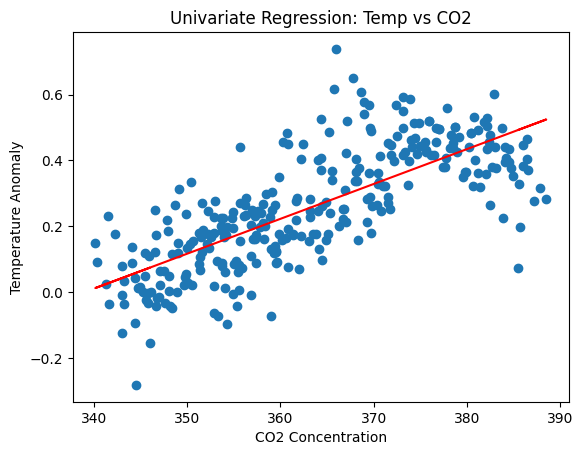

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Simple regression with CO2
X = data[['CO2']]
y = data['Temp']
model = LinearRegression()
model.fit(X, y)

# Prediction and R²
y_pred = model.predict(X)
print(f"R²: {r2_score(y, y_pred)}")

# Plotting
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("CO2 Concentration")
plt.ylabel("Temperature Anomaly")
plt.title("Univariate Regression: Temp vs CO2")
plt.show()

2.2: What does this R² value tell you about your model's performance?

Answer the question here:

R² of 0.56 means the model explains 56% of the variability in temperature based on the predictors.Tthe model captures some important relationships, but there's still unexplained variation. More predictors might improve performance.


# 3. Multivariate Linear Regression



*   Use all numerical variables except Year, Month, and Temp to predict temperature.
*   Report the R² value.
*   Predict and calculate residuals.
*   Plot the new residuals.

R² (Multivariate): 0.7439939571287756


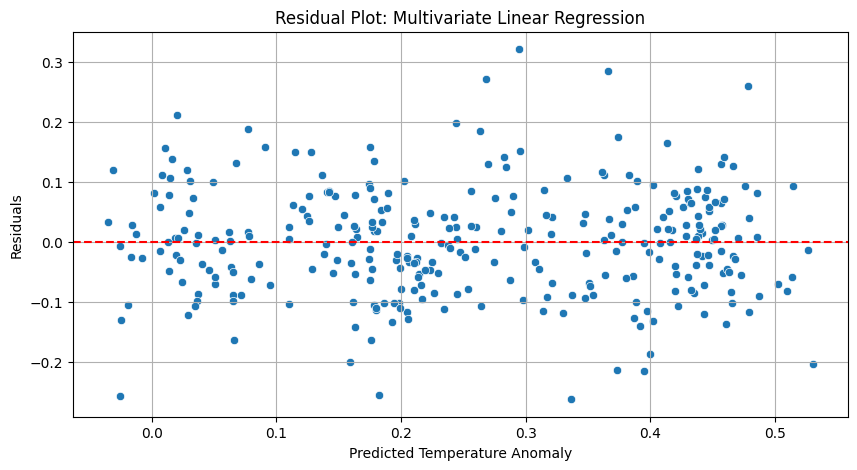

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and target
features = ['CO2', 'N2O', 'CH4', 'CFC-11', 'CFC-12', 'Aerosols', 'TSI', 'MEI']
X_multi = data[features]
y = data['Temp']

# Fit multivariate linear regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
y_multi_pred = model_multi.predict(X_multi)

# Print R²
print(f"R² (Multivariate): {r2_score(y, y_multi_pred)}")

# Plot residuals
residuals = y - y_multi_pred
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_multi_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Temperature Anomaly")
plt.ylabel("Residuals")
plt.title("Residual Plot: Multivariate Linear Regression")
plt.grid(True)
plt.show()

# 4. Handling Categorical Variables


*   Add the **Month variable** into the regression using **one-hot encoding** (Also including all numerical variables).
*   Fit the new model and report the R² value.

In [ ]:
# One-hot encode Month
data_encoded = pd.get_dummies(data, columns=['Month'], drop_first=True)
X_cat = data_encoded.drop(columns=['Temp', 'Year'])  # exclude target & Year
y_cat = data_encoded['Temp']

model_cat = LinearRegression()
model_cat.fit(X_cat, y_cat)
y_cat_pred = model_cat.predict(X_cat)

print(f"R² (with Month categorical): {r2_score(y_cat, y_cat_pred)}")

R² (with Month categorical): 0.7813607405606985


# 4. Try a Transformation

*   Use all numerical variables except Year, Month, and Temp to predict temperature like Q3.
*   Transform the target variable using log-plus-one transformation.
*   Refit the model.
*   Predict and calculate residuals
*   Plot the new residuals

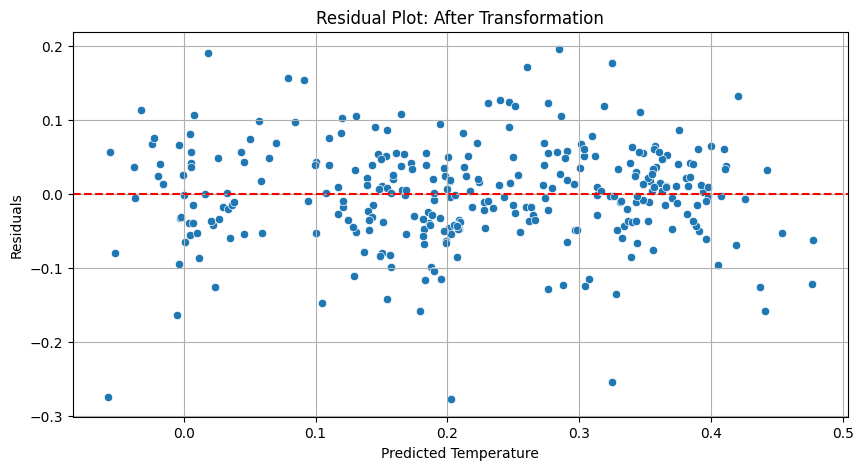

In [ ]:
import numpy as np
# Prepare features and target
features = ['CO2', 'N2O', 'CH4', 'CFC-11', 'CFC-12', 'Aerosols', 'TSI', 'MEI']
X_multi = data[features]
y = data['Temp']

y_log = np.log(y+1)

model_trans = LinearRegression()
model_trans.fit(X_cat, y_log)

y_log_pred = model_trans.predict(X_cat)
residuals_trans = y_log - y_log_pred


plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_log_pred, y=residuals_trans)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.title("Residual Plot: After Transformation")
plt.grid(True)
plt.show()


Compare to the residuals Plot in Q3, did the transformation improve the residual pattern? Why or why not?

Answer question here:

Both residual plots show a random scatter around zero with no obvious patterns. This suggests that the assumptions of linear regression are met in both models. Since the original model already performs well, there is no strong reason to apply the log transformation in this case.